In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
backgroundSub = cv2.createBackgroundSubtractorMOG2()

In [3]:
background = cv2.imread('background.jpg')

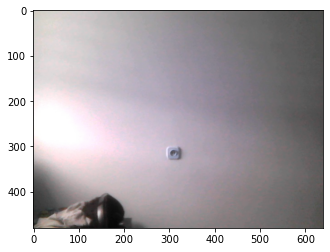

In [4]:
plt.imshow(background)

In [28]:
class Invis():
    def __init__(self):
        self.lowest = 0
        self.highest = 0
        
    def register_colors(self, frame, b):
        h = []
        s = []
        v = []
        for x in frame:
            for y in x:
                h.append(y[0])
                s.append(y[1])
                v.append(y[2])
        if isinstance(self.lowest, list):           
            h += [self.lowest[0], self.highest[0]]
            s += [self.lowest[1], self.highest[1]]
            v += [self.lowest[2], self.highest[2]]
        h = sorted(h)
        s = sorted(s)
        v = sorted(v)
        self.lowest = [np.mean(h[:len(h)//b]), np.mean(s[:len(s)//b]), np.mean(v[:len(v)//b])]
        self.highest = [np.mean(h[len(h) - len(h)//b:]), np.mean(s[len(s) - len(s)//b:]), np.mean(v[len(v) - len(v)//b:])]
    
    def reset(self):
        self.lowest = 0
        self.highest = 0
        
invis = Invis()

In [6]:
invis.lowest
invis.highest

0

In [32]:
cap = cv2.VideoCapture(0)

# FOR RECORDING
#width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) + 0.5)
#height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) + 0.5)
#size = (width, height)
#fourcc = cv2.VideoWriter_fourcc(*'XVID')
#out = cv2.VideoWriter('video.avi', fourcc, 20.0, size)

cv2.namedWindow("preview")
#cv2.moveWindow("preview", 2000, 100)


if cap.isOpened():  # try to get the first frame
    rval, frame = cap.read()
else:
    rval = False

while rval:
    mask = cv2.inRange(frame, np.array(invis.lowest), np.array(invis.highest))
    cv2.imshow("preview", cv2.bitwise_not(frame,frame,mask = mask))
    rval, frame = cap.read()
    #out.write(frame_f)
    key = cv2.waitKey(20)
    if key == 27:  # exit on ESC
        break
    if key == 32:
        invis.register_colors(frame, 100)
    if key == ord('r'):
        invis.reset()

cap.release()
#out.release()
cv2.destroyWindow("preview")

In [122]:
cap = cv2.VideoCapture(0)

# FOR RECORDING
#width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) + 0.5)
#height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) + 0.5)
#size = (width, height)
#fourcc = cv2.VideoWriter_fourcc(*'XVID')
#out = cv2.VideoWriter('video.avi', fourcc, 20.0, size)

cv2.namedWindow("preview")
#cv2.moveWindow("preview", 2000, 100)


if cap.isOpened():  # try to get the first frame
    rval, frame = cap.read()
else:
    rval = False
on = True
u = 255
d = 10

# BACKGROUND REMOVAL
while rval:
    if on:
        temp = cv2.cvtColor(cv2.subtract(background, frame), cv2.COLOR_BGR2GRAY)
        _, mask = cv2.threshold(temp, d, u, cv2.THRESH_BINARY)
        #mask = cv2.bitwise_not(temp)
    else:
        temp = frame
    cv2.imshow("preview", cv2.bitwise_and(frame, frame, mask=mask))
    #cv2.imshow("preview", temp)
    rval, frame = cap.read() 
    #out.write(frame_f)
    key = cv2.waitKey(20)
    if key == 27:  # exit on ESC
        break
    # SET BACKGROUND
    if key == 32:
        background = frame
    # TURN ON/OFF
    if key == ord('r'):
        on = not on
    if key == ord('u'):
        u -= 1
        print(u)
    if key == ord('i'):
        u += 1
        print(u)
    if key == ord('o'):
        d -= 1
        print(d)
    if key == ord('p'):
        d += 1
        print(d)

cap.release()
#out.release()
cv2.destroyWindow("preview")

254
253
252
251
250
249
248
247
246
245
244
243
242
241
240
239
238
237
236
235
234
233
232
231
232
233
234
235
236
237
238
239
240
239
240
239
240
239
240
239
240
9
8
7
6
5
4
3
2
1
0
-1
-2
-3
-4
-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
134
133
132
131
130
129
128
127
126
125
124
123
122
121
120
119
118
117
116
115
114
113
112
111
110
109
108
107
106
105
104
103
102
101
100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28